In [167]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
sns.set_theme()
# Read the data
path_to_data = "data"

batch_folders = ["batch1", "batch2", "batch3", "batch4"]

list_of_dataframes = []

In [168]:

def load_batch(batch_folder) -> list:
    """
    Load a batch of data from a folder.
    :param batch_folder: the folder containing the data
    :return: a list of dataframes
    """
    list_of_dataframes = []
    samples = os.listdir(os.path.join(path_to_data, batch_folder))
    samples.sort(key=lambda f: int(re.sub('\D', '', f)))
    for sample in samples:
        df = pd.read_csv(os.path.join(path_to_data, batch_folder, sample), index_col=0)
        list_of_dataframes.append(df)

    return list_of_dataframes

df_batches = []

for batch_folder in batch_folders:
    df_batches.append(load_batch(batch_folder))

In [169]:
df_batches[2][1]

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s27,s28,s29,s30,s31,s32,temperature,humidity,trial_state,label
seconds,,,,,,,,,,,,,,,,,,,,,
0.0,11356,73437,28325,40678,198559,18270,128218,66769,187706,65670,...,33200,25820,177100,22297,388523,240366,21.470000,40.330000,baseline,fresh
3.0,11358,73457,28313,40689,198411,18267,128265,66759,187720,65661,...,33197,25827,177119,22314,388655,240301,21.440000,40.339082,baseline,fresh
6.0,11358,73455,28321,40690,198476,18267,128322,66787,187680,65645,...,33201,25817,177106,22299,388772,240282,21.448167,40.343666,baseline,fresh
9.0,11358,73447,28314,40717,198474,18264,128422,66776,187681,65659,...,33207,25824,177114,22296,388804,240481,21.455788,40.350000,baseline,fresh
12.0,11358,73468,28328,40736,198488,18264,128434,66807,187723,65660,...,33211,25819,177118,22306,388729,240377,21.432484,40.360000,baseline,fresh
15.0,11358,73453,28319,40727,198542,18259,128342,66770,187711,65652,...,33196,25817,177122,22312,388982,240413,21.439197,40.379598,baseline,fresh
18.0,11357,73474,28313,40719,198476,18264,128333,66785,187737,65657,...,33202,25812,177099,22304,389035,240424,21.440000,40.384192,baseline,fresh
21.0,11358,73453,28325,40735,198428,18267,128258,66786,187644,65651,...,33275,26082,177727,22563,389329,240599,21.426557,40.410165,baseline,fresh
24.0,11375,74005,28319,42739,198547,18326,128339,66955,188006,66085,...,33402,26698,178234,22907,389370,240882,21.417763,41.594984,baseline,fresh


In [170]:
total_samples = 0
for df in df_batches:
    total_samples += len(df)
total_samples

138

In [171]:
def get_shape_stats(df_batch):
    lengths = []
    for df in df_batch:
        lengths.append(df.shape[0])
    return np.mean(lengths), np.std(lengths), np.min(lengths), np.max(lengths)

sample_length_stats = []

for df in df_batches:
    sample_length_stats.append(get_shape_stats(df))

sample_length_stats

[(35.775, 0.7578753195612058, 34, 37),
 (34.5, 0.5, 34, 35),
 (34.5, 0.5, 34, 35),
 (34.5, 0.5, 34, 35)]

In [172]:

def get_trial_state_start_time_stats(df_batch):
    trial_states = {"baseline": [], "exposure":[], "recovery":[]}
    for trial_state in trial_states.keys():
        trial_states[trial_state]
        trial_start_times = []
        for df in df_batch:
            trial_start_times.append(df[df["trial_state"] == trial_state].index[0])
        
        trial_states[trial_state] = (np.mean(trial_start_times), np.std(trial_start_times))
    return trial_states

for df in df_batches:
    print(get_trial_state_start_time_stats(df))


{'baseline': (0.0, 0.0), 'exposure': (30.0, 0.0), 'recovery': (48.0, 0.0)}
{'baseline': (0.0, 0.0), 'exposure': (30.0, 0.0), 'recovery': (48.0, 0.0)}
{'baseline': (0.0, 0.0), 'exposure': (30.0, 0.0), 'recovery': (48.0, 0.0)}
{'baseline': (0.0, 0.0), 'exposure': (30.0, 0.0), 'recovery': (48.0, 0.0)}


All the exposure and recovery periods begin at the exact same time! This means I can just clip the end of each sample to the minimum length and get consistent sample lengths.

In [173]:
min_length = int(sample_length_stats[0][2])


def cut_to_min_length(df_batch):
    df_batch_min_length = []
    for batch in df_batch:
        min_length_batch = []
        for sample in batch:
            df_min_length = sample.iloc[:min_length].copy()
            min_length_batch.append(df_min_length)
        df_batch_min_length.append(min_length_batch)
    return df_batch_min_length

# cut all samples to the minimum length
df_batches_min_length = cut_to_min_length(df_batches)


In [174]:
# split samples in real valued and categorical columns


def split_samples(
    df_batch,
    real_valued_columns,
    categorical_columns,
):
    real_valued_df_batch = []
    categorical_df_batch = []
    for batch in df_batch:
        real_valued_samples = []
        categorical_samples = []
        for sample in batch:
            real_valued_samples.append(sample[real_valued_columns])
            categorical_samples.append(sample[categorical_columns])
        real_valued_df_batch.append(real_valued_samples)
        categorical_df_batch.append(categorical_samples)


    return real_valued_df_batch, categorical_df_batch

categorical_columns = ["trial_state", "label"]
drop_columns = []
real_valued_columns = [col for col in df_batches_min_length[0][0].columns if col not in categorical_columns]
real_valued_columns = [col for col in real_valued_columns if col not in drop_columns]
real_valued_df_batches, categorical_df_batches = split_samples(df_batches_min_length, real_valued_columns, categorical_columns)
print(real_valued_columns)



['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 'temperature', 'humidity']


In [175]:
categorical_columns = ["trial_state", "label"]
drop_columns = ["humidity"]
real_valued_columns = [col for col in df_batches_min_length[0][0].columns if col not in categorical_columns]
real_valued_columns = [col for col in real_valued_columns if col not in drop_columns]
print(real_valued_columns)
real_valued_df_batches_no_humidity, categorical_df_batches = split_samples(df_batches_min_length, real_valued_columns, categorical_columns)



['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 'temperature']


In [176]:
# normalization by average value of baseline

def normalize_by_baseline(real_valued_df_batches, categorical_df_batches):
    """
    Normalizes the real valued samples by the average value of the baseline.
    Returns a list of tuples (normalized_sample, categorical_sample) for each batch. Shape [batch, sample, split]

    """
    number_of_nan_samples = 0
    nan_batches, nan_samples = [], []
    df_batch_normalized = []
    for real_batch, categorical_batch, batch_number in zip(real_valued_df_batches, categorical_df_batches, range(len(real_valued_df_batches))):
        normalized_batch = []
        for real_sample, categorical_sample, sample_number in zip(real_batch, categorical_batch, range(len(real_batch))):
            baseline_mean = real_sample[categorical_sample["trial_state"] == "baseline"].mean()
            df_normalized = real_sample/baseline_mean
            
            # i will drop samples with 0 humidity and 0 temperature registers
            if df_normalized.isnull().values.any():
                number_of_nan_samples += 1
                nan_batches.append(batch_number)
                nan_samples.append(sample_number)
            else:
                normalized_batch.append((df_normalized, categorical_sample))
        df_batch_normalized.append(normalized_batch)
    print("Number of normalized samples with NaN values: ", number_of_nan_samples)
    print(nan_batches)
    print(nan_samples)
    return df_batch_normalized

df_batches_normalized = normalize_by_baseline(real_valued_df_batches, categorical_df_batches)
df_batches_normalized_no_humidity = normalize_by_baseline(real_valued_df_batches_no_humidity, categorical_df_batches)


Number of normalized samples with NaN values:  20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 4, 5, 8, 9, 12, 14, 16, 19, 20, 21, 22, 24, 26, 27, 29, 30, 34, 35]
Number of normalized samples with NaN values:  20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 4, 5, 8, 9, 12, 14, 16, 19, 20, 21, 22, 24, 26, 27, 29, 30, 34, 35]


<AxesSubplot: xlabel='seconds'>

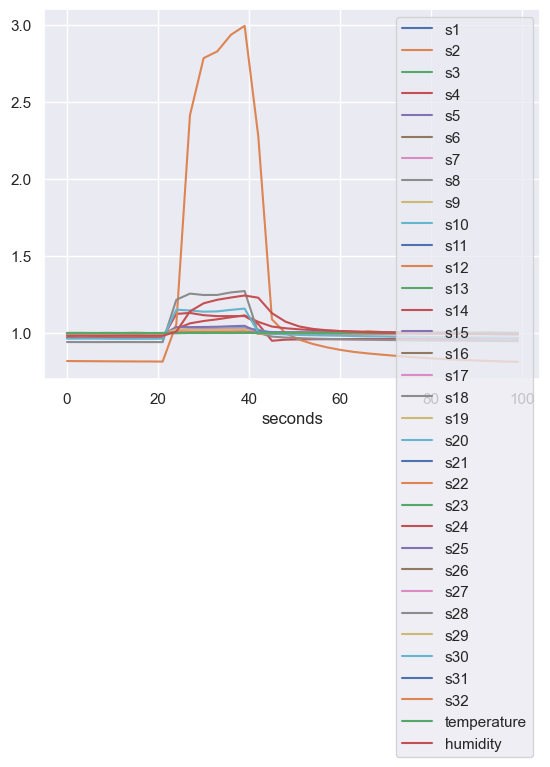

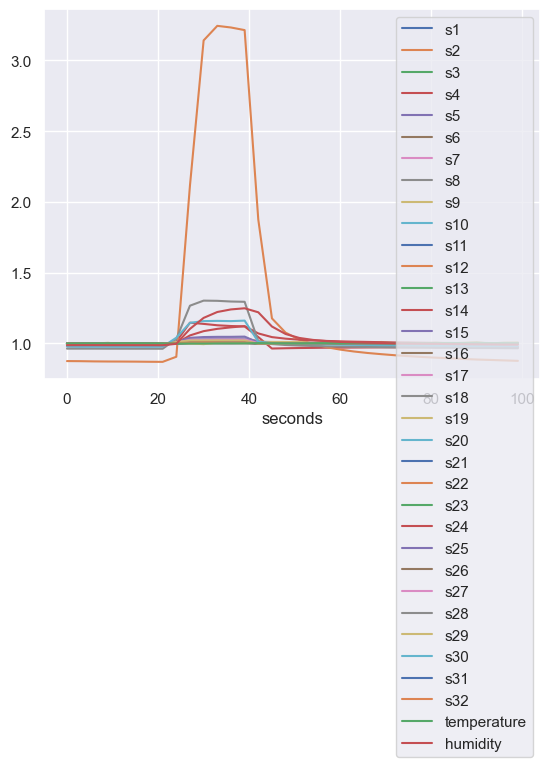

In [177]:
df_batches_normalized[0][19][0].plot()
df_batches_normalized[0][14][0].plot()

In [178]:
# collapse all samples into one array with lagged features to perform dimensionality reduction
def build_features_lagged(df_batches_normalized):
    """
    Builds a feature array with lagged features for each sample.
    Returns a tuple (feature_array, labels_array) with shape [samples, features] and [samples, 1]
    """
    lagged_features_array = []
    labels_array = []
    columns_array = []

    # create vector with shifted column names
    sample = df_batches_normalized[0][0][0]
    columns = sample.columns.to_list()
    # columns_array = []
    
    #initialize columns_array with the first columns
    columns_array = columns.copy()

    for i in range(1, sample.shape[0]):
        for j in range(len(columns)):
            shifted_col = columns[j] + "_shifted_t_"+str(i)
            columns_array.append(shifted_col)
    columns_array = np.array(columns_array)

    for batch in df_batches_normalized:
        for sample in batch:
            data = sample[0].values
            labels = sample[1].values[0]
            flattened_data = np.expand_dims(data.flatten(), axis=0)
            lagged_features_array.append(flattened_data)
            labels_array.append(labels)

    lagged_features_array = np.vstack(lagged_features_array)
    labels_array = np.vstack(labels_array)
    labels_array = np.expand_dims(labels_array[:, 1], axis=1)
    return lagged_features_array, labels_array, columns_array
    
lagged_features, labels, columns_array = build_features_lagged(df_batches_normalized)
lagged_features_no_humidity, _, _ = build_features_lagged(df_batches_normalized_no_humidity)


# labels

In [179]:
# dimensionality reduction with PCA
from sklearn.decomposition import PCA
def perform_pca(lagged_features, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(lagged_features)
    return pca

pca = perform_pca(lagged_features, 2)
pca_no_humidity = perform_pca(lagged_features_no_humidity, 2)

#t-sne
from sklearn.manifold import TSNE
def perform_tsne(lagged_features, n_components):
    tsne = TSNE(n_components=n_components)
    tsne.fit(lagged_features)
    return tsne


In [180]:
import matplotlib.pyplot as plt
pca_coordinates = pca.transform(lagged_features)
pca_coordinates_no_humidity = pca_no_humidity.transform(lagged_features_no_humidity)

tsne_coordinates = perform_tsne(lagged_features, 2).embedding_
tsne_no_humidity_coordinates = perform_tsne(lagged_features_no_humidity, 2).embedding_


def plot_dimensionality_reduction(new_coordinates, labels, experiment_name):
    """
    Plots the dimensionality reduction of the samples.
    """
    new_coordinates = np.concatenate((new_coordinates, labels), axis=1)
    # tips = sns.load_dataset("tips")
    dataframe = pd.DataFrame(data=new_coordinates, columns=("1st component", "2nd component", "label"))
    g = sns.FacetGrid(dataframe, hue="label").map(plt.scatter, "1st component", "2nd component").add_legend()
    # sns.FacetGrid(dataframe_no_humidity, hue="label").map(plt.scatter, "1st component", "2nd component").add_legend()
    plt.title(experiment_name)
    plt.show()


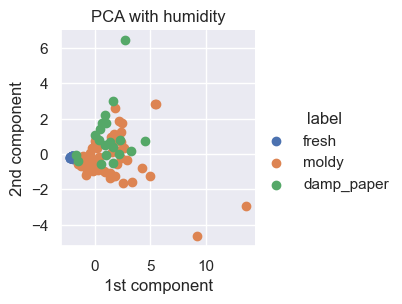

0.9032170297439799

In [181]:
plot_dimensionality_reduction(pca_coordinates, labels, "PCA with humidity")

pca.explained_variance_ratio_.sum()

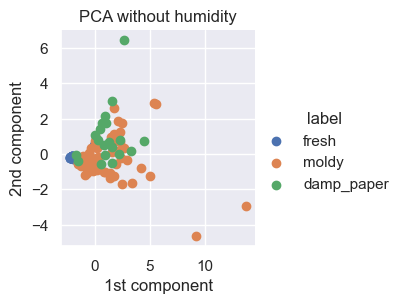

0.9048824299946916

In [182]:
plot_dimensionality_reduction(pca_coordinates_no_humidity, labels, "PCA without humidity")
pca_no_humidity.explained_variance_ratio_.sum()

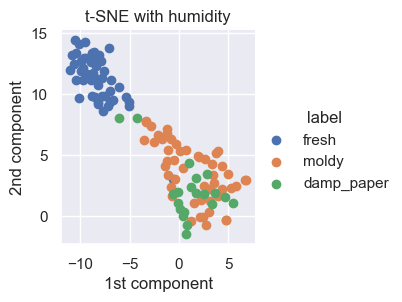

In [183]:
plot_dimensionality_reduction(tsne_coordinates, labels, "t-SNE with humidity")

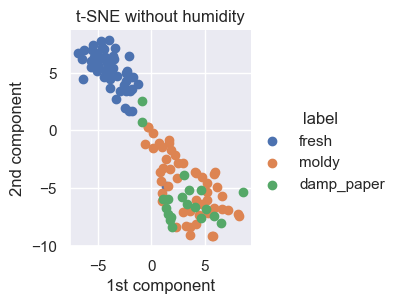

In [184]:
plot_dimensionality_reduction(tsne_no_humidity_coordinates, labels, "t-SNE without humidity")

From the plots above, PCA with two components results in an explained variance of 90% among those first two components, with or without humidity in the features. 
I can distinguish both groups, but the 'fresh' group is collapsed into a dense area and its not obvious whether the groups are separable or not.
On the other hand, performing t-SNE does give us more clearly separable results, both with and without humidity in the analysis.

From the above analysis, I can conclude that there does seem to be an indication of separability between the classes. Moreover, this separability does not seem to be exclusively due to the correlation between humidity and the moldy class, and between humidity and the sensors, because in both sets of experiments the separability is observed. 

I will try one more technique for showing that this separability exists, but this time using a classifier.

In [185]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(np.squeeze(labels))
labels_encoded = le.transform(np.squeeze(labels))
print(le.classes_)
labels_encoded

['damp_paper' 'fresh' 'moldy']


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(lagged_features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

# check percentage of classes in splits
print("Train set: ", np.bincount(y_train)/len(y_train))
print("Test set: ", np.bincount(y_test)/len(y_test))

Train set:  [0.17021277 0.40425532 0.42553191]
Test set:  [0.16666667 0.41666667 0.41666667]


I will train a model using a gradient boosted ensemble of decision trees. This is readily made available by a package called XGBoost, which has a Python API. I have heard great things about this technique lately and I was curious to try it out. Furthermore, the fact that it is based on decision trees will let me compute the importance of the features for performing this classification. That way, I will be able to see how important the humidity is for separating the fresh and moldy classes, taking into account the damp paper control class.

In [187]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb.set_config(verbosity=1)
xgb_model = xgb.XGBClassifier(num_class=3,
        n_estimators=10,
        max_depth=5,
        objective='multi:softprob',
        random_state=42,
        eval_metric=['auc', 'aucpr'],
        subsample=0.3,
    )

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


[0]	validation_0-auc:0.96429	validation_0-aucpr:0.96995
[1]	validation_0-auc:0.92560	validation_0-aucpr:0.93732
[2]	validation_0-auc:0.92351	validation_0-aucpr:0.91326
[3]	validation_0-auc:0.95625	validation_0-aucpr:0.94365
[4]	validation_0-auc:0.97411	validation_0-aucpr:0.95507
[5]	validation_0-auc:0.98006	validation_0-aucpr:0.96215
[6]	validation_0-auc:0.98601	validation_0-aucpr:0.96817
[7]	validation_0-auc:0.98006	validation_0-aucpr:0.96279
[8]	validation_0-auc:0.98899	validation_0-aucpr:0.97079
[9]	validation_0-auc:0.98899	validation_0-aucpr:0.97079


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['auc', 'aucpr'], feature_types=None, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_class=3, num_parallel_tree=1, objective='multi:softprob', ...)

In [188]:
preds = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(y_test)
#print examples in each class
print("Test set: ", np.bincount(y_test))

#get confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, preds, labels=[0,1,2])

print(matrix)
print(accuracy)

[2 1 2 1 1 2 1 2 0 2 1 1 0 2 2 2 0 1 2 2 1 0 1 1]
Test set:  [ 4 10 10]
[[ 3  0  1]
 [ 0 10  0]
 [ 0  0 10]]
0.9583333333333334


In [189]:
feature_importances = xgb_model.feature_importances_
#find where importance is high or low
print("The number of features with importance 0.00 is: ")
print(len(np.where(xgb_model.feature_importances_ == 0.00)[0]))
print("The number of features with importance > 0.00 is: ")
print(len(np.where(xgb_model.feature_importances_ > 0.00)[0]))

#sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
# print(sorted_idx)
# print(feature_importances[sorted_idx])
important_features = columns_array[sorted_idx]
print(important_features[0:36])
# important_features

The number of features with importance 0.00 is: 
1120
The number of features with importance > 0.00 is: 
36
['s27_shifted_t_6' 's4_shifted_t_6' 's21_shifted_t_10' 's15_shifted_t_4'
 's15_shifted_t_5' 's2' 's8_shifted_t_10' 's12_shifted_t_10'
 's15_shifted_t_7' 's31_shifted_t_12' 's8_shifted_t_11' 's18_shifted_t_1'
 's15' 's24' 's9_shifted_t_10' 's6' 's15_shifted_t_11' 's1_shifted_t_2'
 's29' 's11' 's4_shifted_t_9' 's7' 's32_shifted_t_5' 's4'
 's17_shifted_t_32' 's1_shifted_t_3' 's16_shifted_t_3' 's14'
 's16_shifted_t_5' 'temperature' 's16_shifted_t_2' 's19' 's19_shifted_t_3'
 'humidity_shifted_t_1' 's16_shifted_t_6' 'temperature_shifted_t_10']


<BarContainer object of 20 artists>

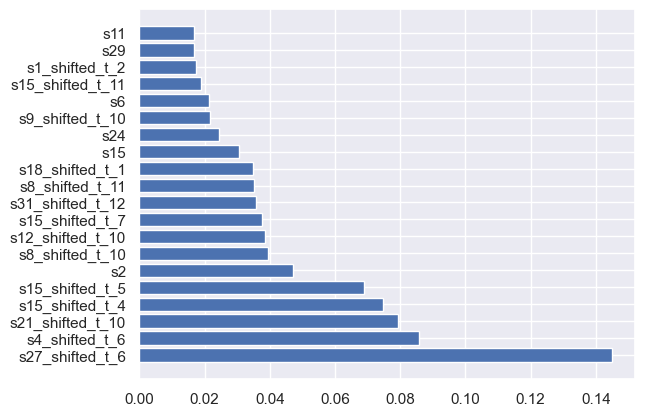

In [190]:
plt.barh(important_features[:20], feature_importances[sorted_idx][:20])

It is interesting how a classifier based on an ensemble of gradient boosted decision trees manages to almost perfectly classify the test set. I could be having some form of data leakage or need to do k-fold cross validation. 
Plotting the feature importances shows that the features that the ensemble is relying on the most are the sensor values, including  sensor values at [t+10-t+17], which are the times when there is exposure to the analytes in the experiments. Interestingly, the model does not attribute much importance to the humidity features: it is the third least important feature among those found to have any importance at all.
This leads me to believe that this particular classification problem is easy enough for this powerful technique.

Just to verify this, I will train a support vector machine classifier, which is great for the case when we have little data and the number of features is greater than the number of samples. SVMs are typically used for binary classification, and build a decision boundary that tries to maximize the gap between the supports of each class (i.e. they optimize for separability). In this case, we have 3 classes, so the SVM will build one versus one classifiers. 


In [191]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
# print(preds)
# print(y_test)
accuracy = accuracy_score(y_test, preds)
print(accuracy)


0.7916666666666666


We now get 79% accuracy on the test set, which is also good.

To conclude:

I did relatively little feature engineering and feature selection. I was initially interested in analyzing the data in a "raw" format. I collapsed the time dimension and just concatenated everything to build a feature for each sensor at each time lag. 
I could have clipped this dimension by only taking time gaps around the exposure period (i.e. the end of the baseline period, all the exposure period and some of the recovery period), but with the dimensionality reduction results I got with PCA and t-SNE found this to be unnecessary. These techniques showed me that there was a clear indication of separability between the classes and that this separability was not just due to the humidity. 

Having said that, I wanted to go the extra mile and try to show this separability exists with more "interpretable" classifiers. In the case of the ensemble of gradient boosted trees, I got 95% accuracy on the test set and was able to get the importance of all the features. I was a bit surprised to find that so many features had 0 importance, but I attribute this more to the high capacity of this model (relative to the amount of data) than to those features being effectively unimportant. 

This led me to just try a classifier I knew would be robust to having little data (a "problem" I created by collapsing the time dimension): SVMs. This classifier also gave me a high enough accuracy.

I was thus able to verify that there is an indication of separability between classes. In the case of the dimensionality reduction, this separability is clearly observed. In the case of the classifiers, it can be inferred based on both the nature of these classifiers, and the high accuracy results I got.